## Task 2: Decision Trees for Human Activity Recognition [3 marks]

### Questions

1. **Use Sklearn Library to train Decision Trees.** [1.5 marks]
   - Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall, and confusion matrix of the model.
   - Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall, and confusion matrix of the model.
   - Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall, and confusion matrix of the model.
   - Compare the results of the three models. Which model do you think is better?

2. **Train Decision Tree with varying depths (2-8) using all above 3 methods.** Plot the accuracy of the model on test data vs the depth of the tree. [1 mark]

3. **Are there any participants/activities where the model performance is bad?** If yes, why? [0.5 mark]


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [10]:
xtrain=r'UCI HAR Dataset\X_train.csv'
xtest=r'UCI HAR Dataset\X_test.csv'
ytrain=r'UCI HAR Dataset\y_train.csv'
ytest=r'UCI HAR Dataset\y_test.csv'
xtrain = np.genfromtxt(xtrain, delimiter=',')  
xtest = np.genfromtxt(xtest, delimiter=',')
ytrain = np.genfromtxt(ytrain, delimiter=',')
ytest = np.genfromtxt(ytest, delimiter=',')
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(126, 1500)
(54, 1500)
(126,)
(54,)


2.1.1

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

clf.fit(xtrain, ytrain)

ypred = clf.predict(xtest)

accuracy = accuracy_score(ytest, ypred)

precision = precision_score(ytest, ypred, average='weighted')
recall = recall_score(ytest, ypred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.6111
Precision: 0.6048
Recall: 0.6111


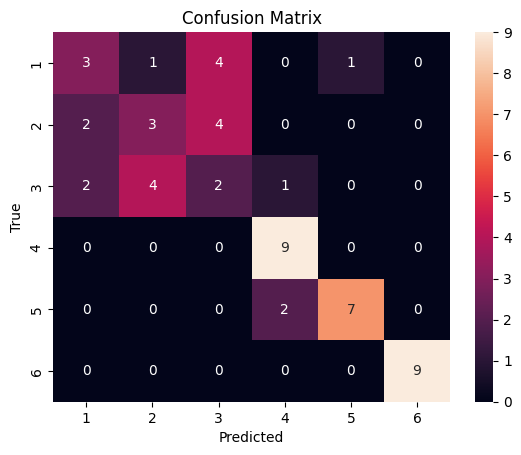

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


mat = confusion_matrix(ytest, clf.predict(xtest))


sns.heatmap(mat, annot=True, fmt="d", cbar=True, xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Displaying the plot
plt.show()


2.1.2

In [14]:
import numpy as np
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


In [15]:
import numpy as np
import pandas as pd

xtrain_path = 'UCI HAR Dataset/X_train.csv'
df = pd.read_csv(xtrain_path, header=None)

data = df.to_numpy()

print("Original shape:", data.shape)

reshaped_data = data.reshape(126, 500, 3)

print("First reshaped data slice:\n", reshaped_data[0])

newxtrain = np.array(reshaped_data)

print("NumPy array shape:", newxtrain.shape)

reshaped_data_2d = newxtrain.reshape(126, -1)

reshaped_df = pd.DataFrame(reshaped_data_2d)

output_csv_path = 'UCI HAR Dataset/X_train_reshaped.csv'

reshaped_df.to_csv(output_csv_path, index=False, header=False)

print(f"Reshaped data saved to {output_csv_path}")


Original shape: (126, 1500)
First reshaped data slice:
 [[ 1.19648   -0.1606898 -0.740178 ]
 [ 1.22203   -0.2672951 -0.7717485]
 [ 1.22311   -0.4338634 -0.7678422]
 ...
 [ 0.4974957 -0.2795907 -0.2029592]
 [ 0.5064167 -0.286091  -0.2564634]
 [ 0.5609918 -0.302237  -0.2553743]]
NumPy array shape: (126, 500, 3)
Reshaped data saved to UCI HAR Dataset/X_train_reshaped.csv


In [17]:
import numpy as np
import pandas as pd

xtest_path = 'UCI HAR Dataset/X_test.csv'

df_xtest = pd.read_csv(xtest_path, header=None)

data_xtest = df_xtest.to_numpy()

print("Original shape of X_test:", data_xtest.shape)

reshaped_data_xtest = data_xtest.reshape(54, 500, 3)

print("First reshaped data slice of X_test:\n", reshaped_data_xtest[0])

newxtest = np.array(reshaped_data_xtest)

print("NumPy array shape of X_test:", newxtest.shape)

reshaped_data_xtest_2d = newxtest.reshape(54, -1)

reshaped_df_xtest = pd.DataFrame(reshaped_data_xtest_2d)

output_csv_xtest_path = 'UCI HAR Dataset/X_test_reshaped.csv'

reshaped_df_xtest.to_csv(output_csv_xtest_path, index=False, header=False)

print(f"Reshaped X_test data saved to {output_csv_xtest_path}")
print(newxtest.shape)


Original shape of X_test: (54, 1500)
First reshaped data slice of X_test:
 [[ 1.293474   -0.3140436  -0.2480047 ]
 [ 1.258798   -0.2909032  -0.5137133 ]
 [ 1.258902   -0.3451832  -0.505633  ]
 ...
 [ 0.6532789  -0.02082443 -0.06393618]
 [ 0.7110597  -0.1404382  -0.00802015]
 [ 0.8174469  -0.2235447  -0.02307176]]
NumPy array shape of X_test: (54, 500, 3)
Reshaped X_test data saved to UCI HAR Dataset/X_test_reshaped.csv
(54, 500, 3)


In [18]:

cfg = tsfel.get_features_by_domain()


xtraintsfel = tsfel.time_series_features_extractor(cfg, newxtrain,verbose=1,fs=50)
xtesttsfel = tsfel.time_series_features_extractor(cfg, newxtest,verbose=1,fs=50)

print(xtraintsfel.shape)
print(xtesttsfel.shape)
print(ytrain.shape)
print(ytest.shape)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
(126, 1152)
(54, 1152)
(126,)
(54,)


In [29]:

clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

clf.fit(xtraintsfel, ytrain)

ypred = clf.predict(xtesttsfel)

accuracy = accuracy_score(ytest, ypred)

precision = precision_score(ytest, ypred, average='macro')
recall = recall_score(ytest, ypred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.7778
Precision: 0.8121
Recall: 0.7778


Accuracy: 0.7778
Precision: 0.8121
Recall: 0.7778


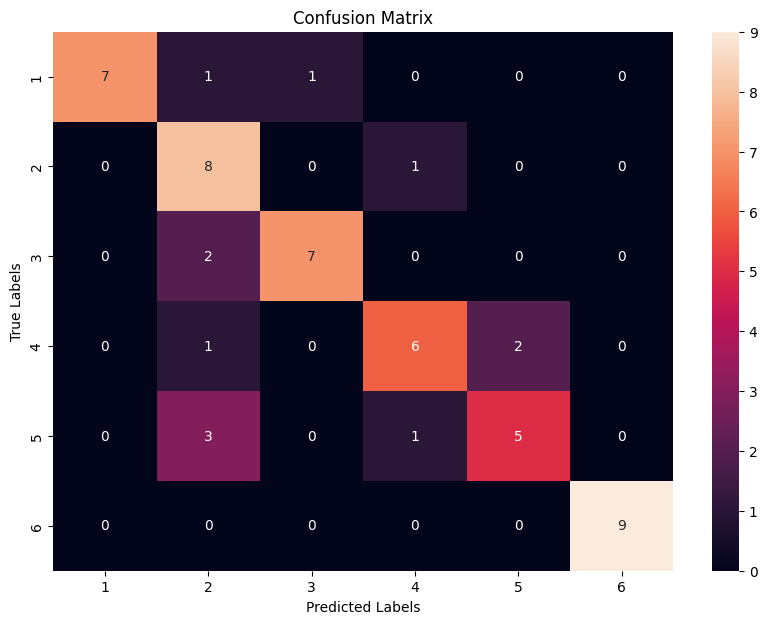

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

clf.fit(xtraintsfel, ytrain)

ypred = clf.predict(xtesttsfel)

accuracy = accuracy_score(ytest, ypred)

precision = precision_score(ytest, ypred, average='macro')
recall = recall_score(ytest, ypred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

conf_matrix = confusion_matrix(ytest, ypred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=True, 
            xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


2.1.3

Shape of X_train: (7352, 561)
Shape of Y_train: (7352,)
Shape of X_test: (2947, 561)
Shape of Y_test: (2947,)
Accuracy: 0.8263
Precision: 0.8292
Recall: 0.8263
Confusion Matrix:
[[446  22  28   0   0   0]
 [ 91 314  65   0   0   1]
 [ 43  48 327   0   0   2]
 [  0   0   0 392  96   3]
 [  0   0   0  83 449   0]
 [  0   0   0  14  16 507]]


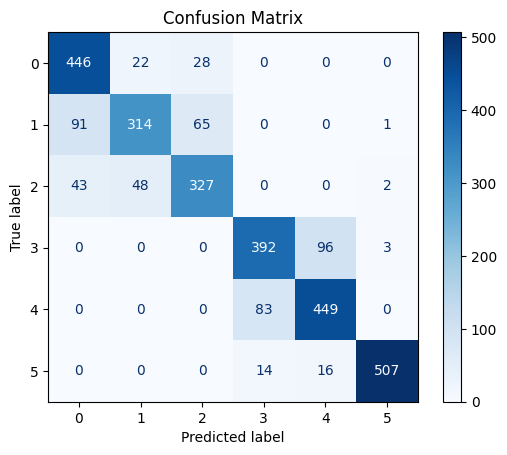

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train_path = 'UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt'
Y_train_path = 'UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt'
X_test_path = 'UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt'
Y_test_path = 'UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt'

X_train = np.loadtxt(X_train_path)
Y_train = np.loadtxt(Y_train_path)
X_test = np.loadtxt(X_test_path)
Y_test = np.loadtxt(Y_test_path)

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

clf.fit(X_train, Y_train)

ypred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, ypred)
precision = precision_score(Y_test, ypred, average='weighted')
recall = recall_score(Y_test, ypred, average='weighted')
conf_matrix = confusion_matrix(Y_test, ypred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

try:
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
except Exception as e:
    print("Error during confusion matrix plotting:", e)


Q2: 

method 1

Depth: 2
Accuracy: 0.5000
Precision: 0.3371
Recall: 0.5000
------------------------------
Depth: 3
Accuracy: 0.6296
Precision: 0.5519
Recall: 0.6296
------------------------------
Depth: 4
Accuracy: 0.6296
Precision: 0.5906
Recall: 0.6296
------------------------------
Depth: 5
Accuracy: 0.7037
Precision: 0.6872
Recall: 0.7037
------------------------------
Depth: 6
Accuracy: 0.6481
Precision: 0.6501
Recall: 0.6481
------------------------------
Depth: 7
Accuracy: 0.6667
Precision: 0.6746
Recall: 0.6667
------------------------------
Depth: 8
Accuracy: 0.6111
Precision: 0.6048
Recall: 0.6111
------------------------------


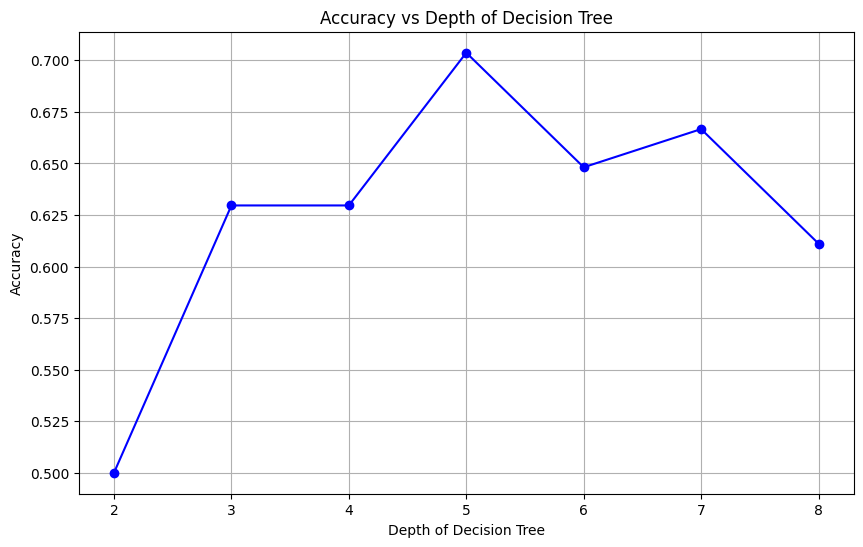

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

depths = range(2, 9)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(
        criterion="gini", 
        random_state=46, 
        min_samples_split=4, 
        max_features='sqrt', 
        max_depth=depth
    )

    clf.fit(xtrain, ytrain)

    ypred = clf.predict(xtest)

    accuracy = accuracy_score(ytest, ypred)
    accuracies.append(accuracy)
    
    precision = precision_score(ytest, ypred, average='weighted', zero_division=0)
    recall = recall_score(ytest, ypred, average='weighted')
    
    print(f"Depth: {depth}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("-" * 30)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Decision Tree')
plt.grid(True)
plt.show()


method 2

Depth: 2
Accuracy: 0.3462
Precision: 0.2643
Recall: 0.5000
------------------------------
Depth: 3
Accuracy: 0.6538
Precision: 0.6455
Recall: 0.6889
------------------------------
Depth: 4
Accuracy: 0.6923
Precision: 0.8381
Recall: 0.7333
------------------------------
Depth: 5
Accuracy: 0.7308
Precision: 0.7798
Recall: 0.7861
------------------------------
Depth: 6
Accuracy: 0.7692
Precision: 0.8254
Recall: 0.8139
------------------------------
Depth: 7
Accuracy: 0.7692
Precision: 0.8254
Recall: 0.8139
------------------------------
Depth: 8
Accuracy: 0.7692
Precision: 0.8254
Recall: 0.8139
------------------------------


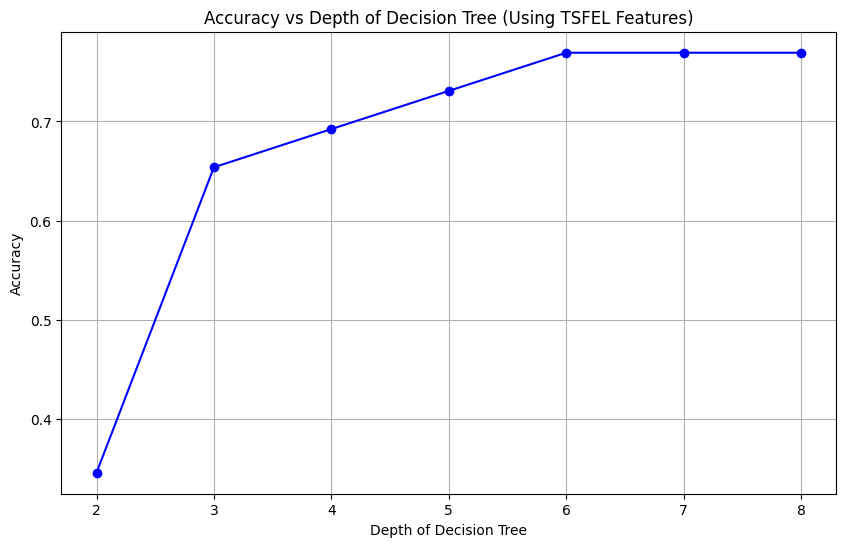

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

xtraintsfel, xtesttsfel, ytrain, ytest = train_test_split(xtraintsfel, ytrain, test_size=0.2, random_state=42)

depths = range(2, 9)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(
        criterion="gini", 
        random_state=46, 
        min_samples_split=4, 
        max_features='sqrt', 
        max_depth=depth
    )

    clf.fit(xtraintsfel, ytrain)

    ypred = clf.predict(xtesttsfel)

    accuracy = accuracy_score(ytest, ypred)
    accuracies.append(accuracy)
    
    precision = precision_score(ytest, ypred, average='macro', zero_division=0)
    recall = recall_score(ytest, ypred, average='macro', zero_division=0)
    
    print(f"Depth: {depth}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("-" * 30)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Decision Tree (Using TSFEL Features)')
plt.grid(True)
plt.show()


method 3:

Shape of X_train: (7352, 561)
Shape of Y_train: (7352,)
Shape of X_test: (2947, 561)
Shape of Y_test: (2947,)
Depth: 2
Accuracy: 0.5490
Precision: 0.4634
Recall: 0.5490

Depth: 3
Accuracy: 0.6237
Precision: 0.6942
Recall: 0.6237



c:\Users\ishika & divita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Depth: 4
Accuracy: 0.7251
Precision: 0.7585
Recall: 0.7251

Depth: 5
Accuracy: 0.7424
Precision: 0.7916
Recall: 0.7424

Depth: 6
Accuracy: 0.7869
Precision: 0.7954
Recall: 0.7869

Depth: 7
Accuracy: 0.8079
Precision: 0.8157
Recall: 0.8079

Depth: 8
Accuracy: 0.8476
Precision: 0.8528
Recall: 0.8476



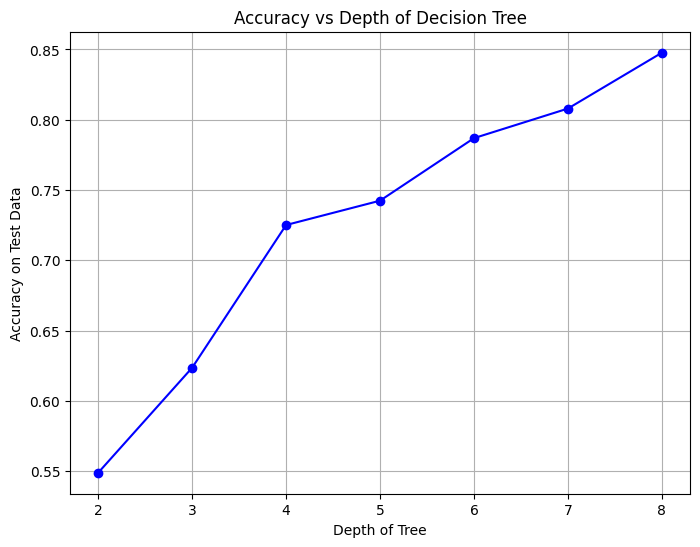

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train_path = 'UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt'
Y_train_path = 'UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt'
X_test_path = 'UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt'
Y_test_path = 'UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt'

X_train = np.loadtxt(X_train_path)
Y_train = np.loadtxt(Y_train_path)
X_test = np.loadtxt(X_test_path)
Y_test = np.loadtxt(Y_test_path)

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

depths = range(2, 9) 
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(
        criterion="gini", 
        random_state=46, 
        min_samples_split=4, 
        max_features='sqrt',
        max_depth=depth
    )

    clf.fit(X_train, Y_train)
    
    ypred = clf.predict(X_test)
    
    accuracy = accuracy_score(Y_test, ypred)
    accuracies.append(accuracy)

    precision = precision_score(Y_test, ypred, average='weighted')
    recall = recall_score(Y_test, ypred, average='weighted')
    conf_matrix = confusion_matrix(Y_test, ypred)

    print(f"Depth: {depth}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    print()

    

plt.figure(figsize=(8, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Depth of Decision Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy on Test Data')
plt.grid(True)
plt.show()


Q3:


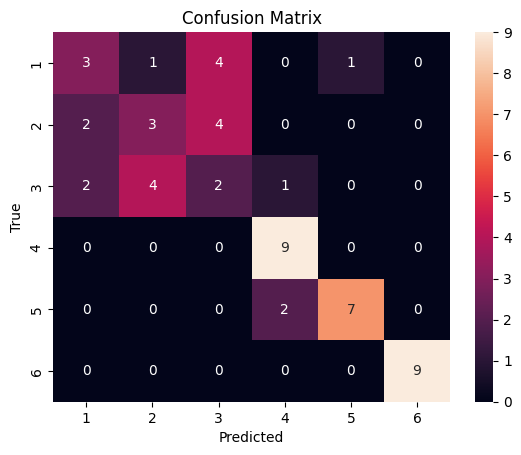

In [ ]:

X_train_flat = xtrain.reshape(xtrain.shape[0], -1)
X_test_flat = xtest.reshape(xtest.shape[0], -1)

clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt')

clf.fit(X_train_flat, ytrain)

mat = confusion_matrix(ytest, clf.predict(X_test_flat))

sns.heatmap(mat, annot=True, fmt="d", cbar=True, xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

plt.show()


The model performs poorly in distinguishing between the activities "Walking" and "Walking Downstairs," as these are often misclassified as "Walking Upstairs." This misclassification occurs because all three activities display similar patterns in acceleration data. The variations in acceleration for these activities are not distinct enough for the model to accurately differentiate between them.

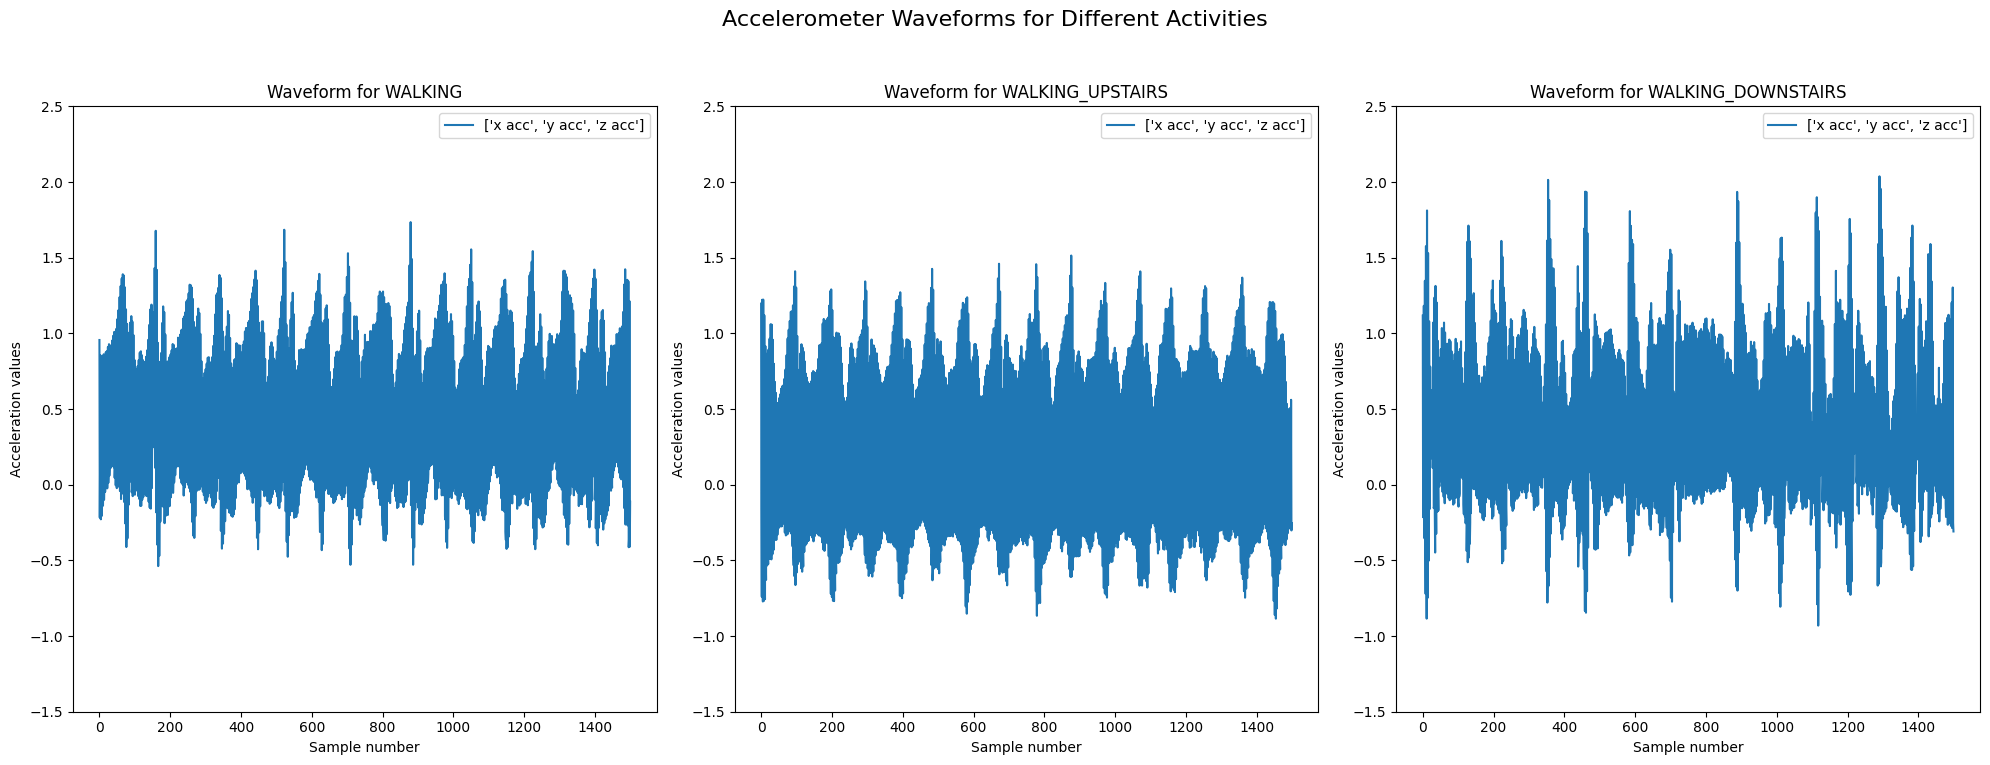

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Accelerometer Waveforms for Different Activities", fontsize=16)
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3}
axes = axes.flatten()

for i, activity in enumerate(classes):
    data = xtrain[ytrain == classes[activity]][0]
    axes[i].plot(data, label=["x acc", "y acc", "z acc"])
    axes[i].set_title(f"Waveform for {activity}")
    axes[i].set_xlabel("Sample number")
    axes[i].set_ylabel("Acceleration values")
    axes[i].set_ylim([-1.5, 2.5])
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()